## Week 2 Homework

Karim Touma \
**karto@gatech.edu**.



**Question 3.1** 

Using the same data set (credit_card_data.txt or credit_card_data-headers.txt) as in Question 2.2, use the ksvm or kknn function to find a good classifier:

- (a)	using cross-validation (do this for the k-nearest-neighbors model; SVM is optional); and
- (b)	splitting the data into training, validation, and test data sets (pick either KNN or SVM; the other is optional).


In [1]:
# reading dataset
# documentation: http://www.sthda.com/english/wiki/reading-data-from-txt-csv-files-r-base-functions
relative_path <- "./data 3.1/credit_card_data-headers.txt"
dataset <- read.csv(relative_path, header = TRUE, sep = "\t", dec = ".")

In [2]:
# verbose of dataset to make sure is right
head(dataset)

A1,A2,A3,A8,A9,A10,A11,A12,A14,A15,R1
1,30.83,0.000,1.25,1,0,1,1,202,0,1
0,58.67,4.460,3.04,1,0,6,1,43,560,1
0,24.50,0.500,1.50,1,1,0,1,280,824,1
1,27.83,1.540,3.75,1,0,5,0,100,3,1
1,20.17,5.625,1.71,1,1,0,1,120,0,1
1,32.08,4.000,2.50,1,1,0,0,360,0,1


In [3]:
summary(dataset)

       A1               A2              A3               A8        
 Min.   :0.0000   Min.   :13.75   Min.   : 0.000   Min.   : 0.000  
 1st Qu.:0.0000   1st Qu.:22.58   1st Qu.: 1.040   1st Qu.: 0.165  
 Median :1.0000   Median :28.46   Median : 2.855   Median : 1.000  
 Mean   :0.6896   Mean   :31.58   Mean   : 4.831   Mean   : 2.242  
 3rd Qu.:1.0000   3rd Qu.:38.25   3rd Qu.: 7.438   3rd Qu.: 2.615  
 Max.   :1.0000   Max.   :80.25   Max.   :28.000   Max.   :28.500  
       A9              A10              A11              A12        
 Min.   :0.0000   Min.   :0.0000   Min.   : 0.000   Min.   :0.0000  
 1st Qu.:0.0000   1st Qu.:0.0000   1st Qu.: 0.000   1st Qu.:0.0000  
 Median :1.0000   Median :1.0000   Median : 0.000   Median :1.0000  
 Mean   :0.5352   Mean   :0.5612   Mean   : 2.498   Mean   :0.5382  
 3rd Qu.:1.0000   3rd Qu.:1.0000   3rd Qu.: 3.000   3rd Qu.:1.0000  
 Max.   :1.0000   Max.   :1.0000   Max.   :67.000   Max.   :1.0000  
      A14               A15              

In [4]:
set.seed(1337)

sample_train_test <- sample(c(TRUE, FALSE), nrow(dataset), replace=TRUE, prob=c(0.85,0.15))
train_test  <- dataset[sample_train_test, ]
val_holdout   <- dataset[!sample_train_test, ]


In [5]:
# Set up train test dataset
library(caTools)
set.seed(123)
split = sample.split(train_test$R1, SplitRatio = 0.75)
training_set = subset(train_test, split == TRUE)
test_set = subset(train_test, split == FALSE)


In [6]:
# Scalling everything but the target column (categorical)
scaled_train <- scale(training_set[,-ncol(training_set)])
scaled_test <- scale(test_set[,-ncol(test_set)])
# Adding the target to the scaled datasets (train and test)
scaled_train <- cbind(scaled_train,R1=training_set$R1)


In [7]:
library(kernlab)
model.ksvm = ksvm(R1 ~ ., data = scaled_train, type="C-svc")

In [8]:
ksvm.pred <- predict(model.ksvm, scaled_test)

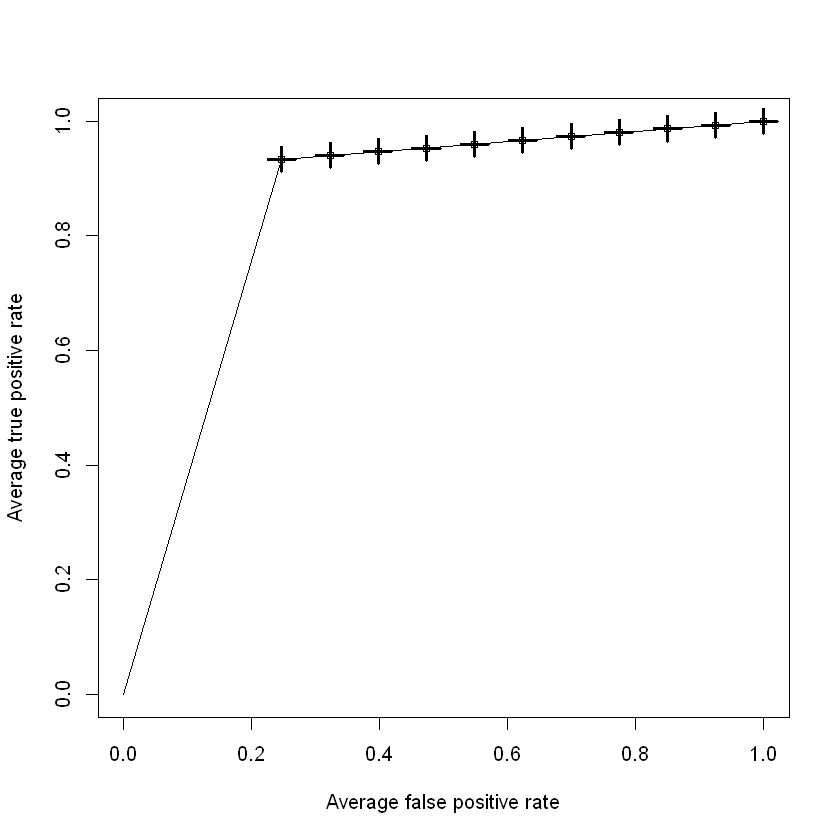

In [11]:
library(ROCR)

pred <- prediction(ksvm.pred, test_set$R1)
perf <- performance(pred, "tpr", "fpr")
#> A performance instance
#>   'False positive rate' vs. 'True positive rate' (alpha: 'Cutoff')
#>   for 10 cross validation runs
plot(perf,
     avg="threshold",
     spread.estimate="boxplot")

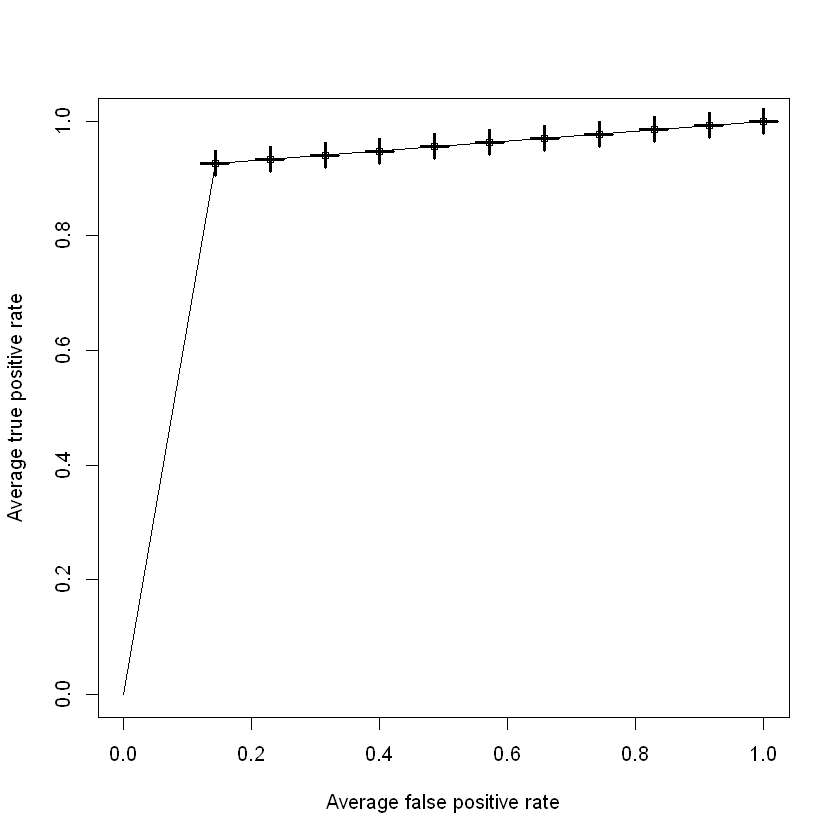

In [10]:
val_holdout_scaled <- scale(val_holdout[,-ncol(val_holdout)])

ksvm.pred_hold <- predict(model.ksvm, val_holdout_scaled)
pred_hold <- prediction(ksvm.pred_hold, val_holdout$R1)
perf_hold <- performance(pred_hold, "tpr", "fpr")
#> A performance instance
#>   'False positive rate' vs. 'True positive rate' (alpha: 'Cutoff')
#>   for 10 cross validation runs
plot(perf_hold,
     avg="threshold",
     spread.estimate="boxplot")

**Question 4.1**


Describe a situation or problem from your job, everyday life, current events, etc., for which a clustering model would be appropriate. List some (up to 5) predictors that you might use.



    1. Example from my job

    Everyday we meet new customers, in terms of stablish a relationship with them, we would like to know in advance their needs or create new products for them. We need to look how similar this new customer is related to previous customers. Obviously we need to gather some datapoints, clusterize and then predict whats the most relevant group of customers is related.
    
    There are several models that we might use such as:
    
        1.1 Agglomerative Clustering
        1.2 DBSCAN
        1.3 K-Means
        1.4 Mean Shift
        1.5 SVM Classifier

**Question 4.2** 

The iris data set iris.txt contains 150 data points, each with four predictor variables and one categorical response. The predictors are the width and length of the sepal and petal of flowers and the response is the type of flower. The data is available from the R library datasets and can be accessed with iris once the library is loaded. It is also available at the UCI Machine Learning Repository (https://archive.ics.uci.edu/ml/datasets/Iris ). The response values are only given to see how well a specific method performed and should not be used to build the model.

Use the R function kmeans to cluster the points as well as possible. Report the best combination of predictors, your suggested value of k, and how well your best clustering predicts flower type.


In [13]:
data(iris)

In [19]:
summary(iris)

  Sepal.Length    Sepal.Width     Petal.Length    Petal.Width   
 Min.   :4.300   Min.   :2.000   Min.   :1.000   Min.   :0.100  
 1st Qu.:5.100   1st Qu.:2.800   1st Qu.:1.600   1st Qu.:0.300  
 Median :5.800   Median :3.000   Median :4.350   Median :1.300  
 Mean   :5.843   Mean   :3.057   Mean   :3.758   Mean   :1.199  
 3rd Qu.:6.400   3rd Qu.:3.300   3rd Qu.:5.100   3rd Qu.:1.800  
 Max.   :7.900   Max.   :4.400   Max.   :6.900   Max.   :2.500  
       Species  
 setosa    :50  
 versicolor:50  
 virginica :50  
                
                
                

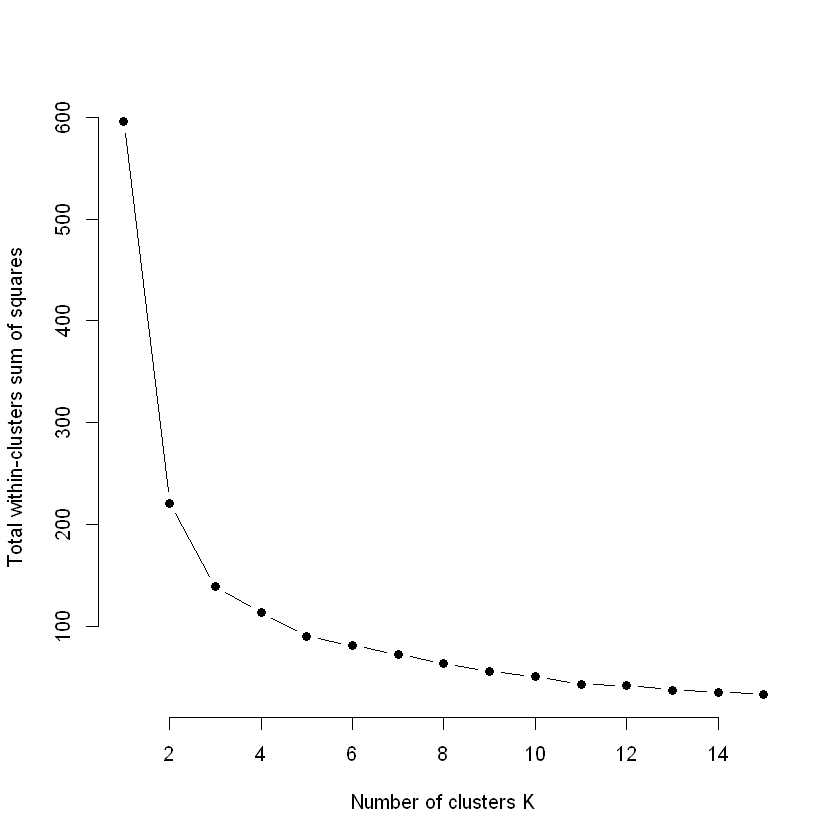

In [28]:
library(purrr)

iris_1 <- iris[, -5]
iris_2 <- scale(iris_1)
# Fitting K-Means clustering Model 
# to training dataset
set.seed(240) # Setting seed

# function to compute total within-cluster sum of square 
wss <- function(k) {
  kmeans(iris_2, k, nstart = 10 )$tot.withinss
}

# Compute and plot wss for k = 1 to k = 15
k.values <- 1:15

# extract wss for 2-15 clusters
wss_values <- map_dbl(k.values, wss)

plot(k.values, wss_values,
       type="b", pch = 19, frame = FALSE, 
       xlab="Number of clusters K",
       ylab="Total within-clusters sum of squares")

The suggested K=3, this means that with 4 there no a decrease in distance

In [33]:
# Testing K=3

kmeans_3 <- kmeans(iris_2, 3, nstart = 10 )

# Confusion Matrix
cm_3 <- table(iris$Species, kmeans_3$cluster)
cm_3

            
              1  2  3
  setosa     50  0  0
  versicolor  0 39 11
  virginica   0 14 36

- Cluster 1 most likely setosa
- Cluster 2 most likely virginica
- Cluster 3 most likely versicolor
